# **Manga Analysis**
#### **Group Members:** 
- Devanshi Joshi 
- Aneesh Krishna
- Kosisochukwu Ibe

In [587]:
import pandas as pd 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import json

In [588]:
mangaCsv = pd.read_csv('mangaCsv.csv')
mangaCsv.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."


In [634]:
MALCsv = pd.read_csv('MAL-manga.csv')
MALCsv.head()

,Unnamed: 0,Title,Rank,Type,Volumes,Published,Members,page_url,image_url,Score
0,0,City Hunter,460,Manga,35,Feb 1985 - Nov 1991,14690,https://myanimelist.net/manga/792/City_Hunter,https://cdn.myanimelist.net/r/100x140/images/m...,8.16
1,1,Keijo!!!!!!!!,4532,Manga,18,Jul 2013 - Apr 2017,12689,https://myanimelist.net/manga/56505/Keijo,https://cdn.myanimelist.net/r/100x140/images/m...,7.31
2,2,Rain,1808,Manga,?,Nov 2008 -,12021,https://myanimelist.net/manga/17237/Rain,https://cdn.myanimelist.net/r/100x140/images/m...,7.67
3,3,Hidari no Futari,17377,One-shot,?,2011 - 2011,1010,https://myanimelist.net/manga/26610/Hidari_no_...,https://cdn.myanimelist.net/r/100x140/images/m...,5.95
4,4,Odd Girl Out,953,Manhwa,?,May 2015 -,4968,https://myanimelist.net/manga/119521/Odd_Girl_Out,https://cdn.myanimelist.net/r/100x140/images/m...,7.90


#### Pre-processing

 Dropping columns that are irrelevant to the analysis

In [589]:
mangaCsv.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."


In [590]:
mangaCsv['authors'][0]

"[{'id': 1868, 'first_name': 'Kentarou', 'last_name': 'Miura', 'role': 'Story & Art'}, {'id': 49592, 'first_name': '', 'last_name': 'Studio Gaga', 'role': 'Art'}]"

In [591]:
def extract_names(author_string):
    authors_list = ast.literal_eval(author_string) 
    if authors_list: 
        author = authors_list[0]  # Only first author
        first_name = author['first_name']
        last_name = author['last_name']
        return f"{first_name} {last_name}"
    else:
        return None

In [592]:
mangaCsv['author_names'] = mangaCsv['authors'].apply(extract_names)

In [593]:
mangaCsv['primary_demographic'] = mangaCsv['demographics'][0]
mangaCsv['secondary_demographic'] = mangaCsv['demographics'][1]
mangaCsv['primary_demographic'] = mangaCsv['primary_demographic'].str.strip("[]").str.strip("'\"")
mangaCsv['secondary_demographic'] = mangaCsv['secondary_demographic'].str.strip("[]").str.strip("'\"")

In [594]:
mangaCsv.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,author_names,primary_demographic,secondary_demographic
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],Kentarou Miura,Seinen,Shounen
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],Eiichiro Oda,Seinen,Shounen
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ...",Hirohiko Araki,Seinen,Shounen
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],Inio Asano,Seinen,Shounen
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts...",Hiromu Arakawa,Seinen,Shounen


In [595]:
columns_to_drop = ['manga_id','title_synonyms', 'title_japanese', 'demographics','title_english','url','main_picture','background','authors','serializations','synopsis','approved','created_at_before','updated_at','real_start_date','real_end_date'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)

In [596]:
mangaCsv.head()

,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,genres,themes,author_names,primary_demographic,secondary_demographic
0,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,643969,119470,True,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",Kentarou Miura,Seinen,Shounen
1,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,579557,111462,True,"['Action', 'Adventure', 'Fantasy']",[],Eiichiro Oda,Seinen,Shounen
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,248511,41713,True,"['Action', 'Adventure', 'Mystery', 'Supernatur...",['Historical'],Hirohiko Araki,Seinen,Shounen
3,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,413897,49361,True,"['Drama', 'Slice of Life']",['Psychological'],Inio Asano,Seinen,Shounen
4,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,284027,29634,True,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Military'],Hiromu Arakawa,Seinen,Shounen


Renaming the column to make it more understandable

In [597]:
mangaCsv.rename(columns={'sfw': 'appropriate'}, inplace=True)


In [598]:
mangaCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  64833 non-null  object 
 1   type                   64833 non-null  object 
 2   score                  24636 non-null  float64
 3   scored_by              64833 non-null  int64  
 4   status                 64833 non-null  object 
 5   volumes                48211 non-null  float64
 6   chapters               46042 non-null  float64
 7   start_date             62950 non-null  object 
 8   end_date               51932 non-null  object 
 9   members                64833 non-null  int64  
 10  favorites              64833 non-null  int64  
 11  appropriate            64833 non-null  bool   
 12  genres                 64833 non-null  object 
 13  themes                 64833 non-null  object 
 14  author_names           64283 non-null  object 
 15  pr

In [599]:
missing_values = mangaCsv.isna().sum()
print(missing_values)

title                        0
type                         0
score                    40197
scored_by                    0
status                       0
volumes                  16622
chapters                 18791
start_date                1883
end_date                 12901
members                      0
favorites                    0
appropriate                  0
genres                       0
themes                       0
author_names               550
primary_demographic          0
secondary_demographic        0
dtype: int64


As most of the columns for the score column are null we choose not to impute it, because it might change the results 

In [600]:
columns_to_drop = ['score','scored_by'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)

Identifying the rows where volumes and chapters both are null

In [601]:
count_rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()].shape[0]
print(f"Number of rows with null values in both 'volumes' and 'chapters': {count_rows_with_nulls}")


Number of rows with null values in both 'volumes' and 'chapters': 9464


There are 9464 records where the values for volumes and chapters is null. 

In [602]:
rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()]
first_few_rows_with_nulls = rows_with_nulls.tail(10)
first_few_rows_with_nulls


,title,type,status,volumes,chapters,start_date,end_date,members,favorites,appropriate,genres,themes,author_names,primary_demographic,secondary_demographic
64783,Ookami Shujin to Usagi Maid-chan,manga,currently_publishing,NaN,NaN,2021-08-04,NaN,5,0,False,"['Erotica', 'Fantasy']",['Anthropomorphic'],Meko Ineno,Seinen,Shounen
64786,Gensaku Kaishi Mae ni Botsuraku shita Akuyaku ...,light_novel,currently_publishing,NaN,NaN,2023-02-28,NaN,5,0,True,['Fantasy'],"['Isekai', 'Reincarnation', 'School']",Gekka Uruu,Seinen,Shounen
64793,All the Marbles!,manga,currently_publishing,NaN,NaN,2019-04-12,NaN,5,0,True,['Sports'],['Team Sports'],Tooru Izu,Seinen,Shounen
64808,Fuyuu Sekai no Aero Notes,light_novel,currently_publishing,NaN,NaN,2021-05-08,NaN,4,0,True,"['Adventure', 'Fantasy']",[],Nimoshi,Seinen,Shounen
64815,Renai Kanjou no Marude Nai Osananajimi Manga,manga,currently_publishing,NaN,NaN,2016-08-04,NaN,4,0,True,['Comedy'],"['Romantic Subtext', 'School']",Kou Watarai,Seinen,Shounen
64817,Rising Sun R,manga,currently_publishing,NaN,NaN,2018-09-04,NaN,4,0,True,['Action'],['Military'],Satoshi Fujiwara,Seinen,Shounen
64819,My Regret,manga,currently_publishing,NaN,NaN,2022-08-26,NaN,4,0,True,['Drama'],['Psychological'],Shion Satouno,Seinen,Shounen
64821,Spunk,manga,currently_publishing,NaN,NaN,2022-05-12,NaN,4,0,True,['Drama'],[],Hideki Arai,Seinen,Shounen
64825,PSO2 New Genesis: Central!,manga,currently_publishing,NaN,NaN,2021-09-15,NaN,4,0,True,"['Comedy', 'Sci-Fi']",[],Fudechin,Seinen,Shounen
64832,Kidou Senshi Gundam F91 Prequel,manga,currently_publishing,NaN,NaN,2020-01-24,NaN,3,0,True,"['Action', 'Sci-Fi']","['Mecha', 'Military', 'Space']",Junji Oono,Seinen,Shounen


Based on the above records we can see that all manga where the values for volumes and chapters is null are currently publishing the manga. 

Assigning a place holder for the manga to denote that they are currently publishing:

In [603]:
mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'volumes'] = mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'volumes'].fillna(0)
mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'chapters'] = mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'chapters'].fillna(0)


In [604]:
rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()]
first_few_rows_with_nulls = rows_with_nulls.tail(5)
first_few_rows_with_nulls


,title,type,status,volumes,chapters,start_date,end_date,members,favorites,appropriate,genres,themes,author_names,primary_demographic,secondary_demographic
61746,Namida no Kazu dake Kagayaite!,manga,finished,NaN,NaN,2012-11-05,2015-03-05,24,0,True,"['Comedy', 'Slice of Life']",['Music'],Ruka Yanase,Seinen,Shounen
63334,Yuusha wa Osorezu,manga,finished,NaN,NaN,2021-09-07,NaN,18,0,True,['Fantasy'],[],Tomoki Matsumoto,Seinen,Shounen
64062,Uranaishi ni wa Hanakishi no Koigokoro ga Miet...,manga,finished,NaN,NaN,2020-12-04,NaN,13,0,True,"['Fantasy', 'Romance']",[],Mikura,Seinen,Shounen
64213,Onna Keiji to Hannin no Otome Game Tensei: Mok...,manga,finished,NaN,NaN,2022-05-25,NaN,12,0,True,"['Fantasy', 'Mystery', 'Romance']","['Detective', 'Isekai', 'Reincarnation']",Ichi Sayo,Seinen,Shounen
64659,Daikazoku Gohan Monogatari,manga,finished,NaN,NaN,2021-07-30,2023-05-26,7,0,True,['Slice of Life'],['Historical'],Rinko Nagami,Seinen,Shounen


In [605]:
count_rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()].shape[0]
print(f"Number of rows with null values in both 'volumes' and 'chapters': {count_rows_with_nulls}")

Number of rows with null values in both 'volumes' and 'chapters': 103


In [606]:
mangaCsv = mangaCsv.drop(index=rows_with_nulls.index)

Imputing 'volume' and 'chapter' values based on relationship of type and status

In [607]:
mangaCsv[mangaCsv['volumes'].isnull()].shape

(7158, 15)

In [608]:
mangaCsv.loc[mangaCsv['chapters'] == 1, 'volumes'] = 1
grouped_medians = mangaCsv.groupby(['type', 'status'])['volumes'].transform('median')
mangaCsv['volumes'] = mangaCsv['volumes'].fillna(grouped_medians)
overall_median = mangaCsv['volumes'].median()
mangaCsv['volumes'] = mangaCsv['volumes'].fillna(overall_median)


In [609]:
mangaCsv[mangaCsv['chapters'].isnull()].shape

(9322, 15)

In [610]:
grouped_medians = mangaCsv.groupby(['type', 'status'])['chapters'].transform('median')
mangaCsv['chapters'] = mangaCsv['chapters'].fillna(grouped_medians)
overall_median = mangaCsv['chapters'].median()
mangaCsv['chapters'] = mangaCsv['chapters'].fillna(overall_median)

Removing rows where start date is null

In [611]:
mangaCsv.dropna(subset=['start_date'], inplace=True)

Extracting year and month from the start date and end date and dropping the date columns

In [612]:
mangaCsv['start_date'] = pd.to_datetime(mangaCsv['start_date'])
mangaCsv['end_date'] = pd.to_datetime(mangaCsv['end_date'])

mangaCsv['start_year'] = mangaCsv['start_date'].dt.year
mangaCsv['start_month'] = mangaCsv['start_date'].dt.month

mangaCsv['end_year'] = mangaCsv['end_date'].dt.year
mangaCsv['end_month'] = mangaCsv['end_date'].dt.month


In [613]:
mangaCsv['end_year'] = mangaCsv['end_year'].fillna(0)
mangaCsv['end_month'] = mangaCsv['end_month'].fillna(0)

mangaCsv['end_year'] = mangaCsv['end_year'].astype(int)
mangaCsv['end_month'] = mangaCsv['end_month'].astype(int)

In [614]:
columns_to_drop = ['start_date','end_date'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)

#### Changing format for genres, themes and demographics 

In [615]:
mangaCsv['genres'] = mangaCsv['genres'].str.replace("'", "").str.replace('[', '').str.replace(']', '').str.replace(',', ' | ')
mangaCsv['themes'] = mangaCsv['themes'].str.replace("'", "").str.replace('[', '').str.replace(']', '').str.replace(',', ' | ')

In [616]:
mangaCsv.head()

,title,type,status,volumes,chapters,members,favorites,appropriate,genres,themes,author_names,primary_demographic,secondary_demographic,start_year,start_month,end_year,end_month
0,Berserk,manga,currently_publishing,0.0,0.0,643969,119470,True,Action | Adventure | Award Winning | Drama ...,Gore | Military | Mythology | Psychological,Kentarou Miura,Seinen,Shounen,1989,8,0,0
1,One Piece,manga,currently_publishing,0.0,0.0,579557,111462,True,Action | Adventure | Fantasy,,Eiichiro Oda,Seinen,Shounen,1997,7,0,0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,finished,24.0,96.0,248511,41713,True,Action | Adventure | Mystery | Supernatural,Historical,Hirohiko Araki,Seinen,Shounen,2004,1,2011,4
3,Oyasumi Punpun,manga,finished,13.0,147.0,413897,49361,True,Drama | Slice of Life,Psychological,Inio Asano,Seinen,Shounen,2007,3,2013,11
4,Fullmetal Alchemist,manga,finished,27.0,116.0,284027,29634,True,Action | Adventure | Award Winning | Drama ...,Military,Hiromu Arakawa,Seinen,Shounen,2001,7,2010,9


In [617]:
# top_10_genres = mangaCsv['genres'].str.split('|').explode().value_counts().head(10)[1:]
top_10_genres = mangaCsv['genres'].str.split('|').explode().str.strip().value_counts().head(11)
top_10_genres = top_10_genres[top_10_genres.index != 'Hentai']
top_10_genres = pd.DataFrame(top_10_genres)
top_10_themes = mangaCsv['themes'].str.split('|').explode().str.strip().value_counts().head(10)
top_10_themes = pd.DataFrame(top_10_themes)

Top 10 genres

In [618]:
top_10_genres

,count
genres,
Romance,16261
Comedy,13729
Fantasy,10777
Drama,9042
Boys Love,8949
Action,8780
Erotica,8251
Supernatural,7366
Slice of Life,5059


Top 10 Themes

In [619]:
top_10_themes

,count
themes,
,39005
School,10555
Historical,2351
Harem,2241
Psychological,1502
Isekai,994
Mythology,769
Mecha,682
Military,669


Approximately 63% of values are null for the themes column. Hence, dropping the column

In [620]:
mangaCsv.drop(columns='themes', axis=1, inplace=True)

In [621]:
mangaCsv.columns

Index(['title', 'type', 'status', 'volumes', 'chapters', 'members',
       'favorites', 'appropriate', 'genres', 'author_names',
       'primary_demographic', 'secondary_demographic', 'start_year',
       'start_month', 'end_year', 'end_month'],
      dtype='object')

#### Exploring the data

In [622]:
mangaCsv.describe()

,volumes,chapters,members,favorites,start_year,start_month,end_year,end_month
count,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000
mean,2.388043,16.683148,1799.194085,56.668464,2010.685534,6.038197,1655.144959,4.999570
std,4.308965,46.854265,11252.702932,1073.484924,8.771883,3.689910,767.662483,4.065691
min,0.000000,0.000000,3.000000,0.000000,1931.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,63.000000,0.000000,2007.000000,3.000000,2001.000000,1.000000
50%,1.000000,8.000000,188.000000,0.000000,2012.000000,6.000000,2011.000000,5.000000
75%,2.000000,13.000000,797.000000,3.000000,2017.000000,9.000000,2016.000000,9.000000
max,200.000000,6477.000000,643969.000000,119470.000000,2023.000000,12.000000,2023.000000,12.000000


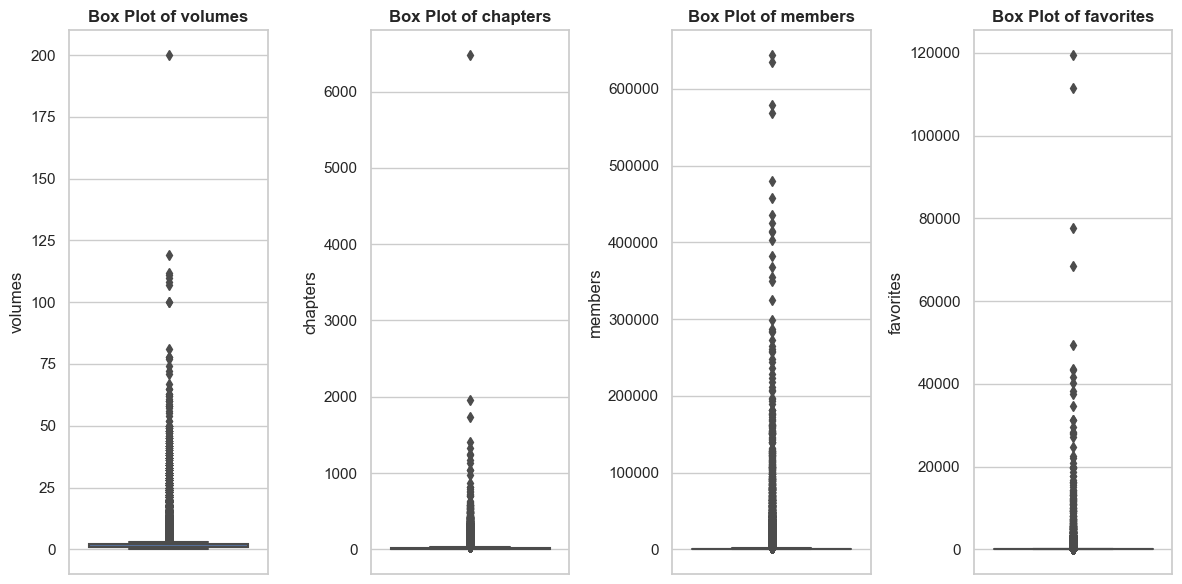

In [623]:
import seaborn as sns

numerical_columns = mangaCsv.select_dtypes(include=['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 6))
sns.set(style="whitegrid") 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=mangaCsv[column])
    plt.title(f'Box Plot of {column}', fontweight='bold')

plt.tight_layout()
plt.show()

The box plots show the distribution of manga dataset variables. 

Volumes and chapters exhibit right-skewed distributions with numerous outliers, indicating manga with exceptionally high counts. 

Members and favorites show wide-ranging distributions with many outliers, suggesting varying popularity levels. 

End year displays a tightly clustered distribution, while end month indicates a uniform distribution. 

Conclusively, volumes and chapters skew towards higher counts, while members and favorites vary widely, 

and end year and end month distributions are more uniform.

Applying logarithmic transformation

In [624]:
mangaCsv['volumes'] = mangaCsv['volumes'].replace(0, 1)
mangaCsv['chapters'] = mangaCsv['chapters'].replace(0, 1)

mangaCsv['log_volumes'] = np.log1p(mangaCsv['volumes'])
mangaCsv['log_chapters'] = np.log1p(mangaCsv['chapters'])

print(mangaCsv[['log_volumes', 'log_chapters']].head())

   log_volumes  log_chapters
0     0.693147      0.693147
1     0.693147      0.693147
2     3.218876      4.574711
3     2.639057      4.997212
4     3.332205      4.762174


In [625]:
mangaCsv['members'] = mangaCsv['members'].replace(0, 1)
mangaCsv['favorites'] = mangaCsv['favorites'].replace(0, 1)

mangaCsv['log_members'] = np.log1p(mangaCsv['members'])
mangaCsv['log_favorites'] = np.log1p(mangaCsv['favorites'])

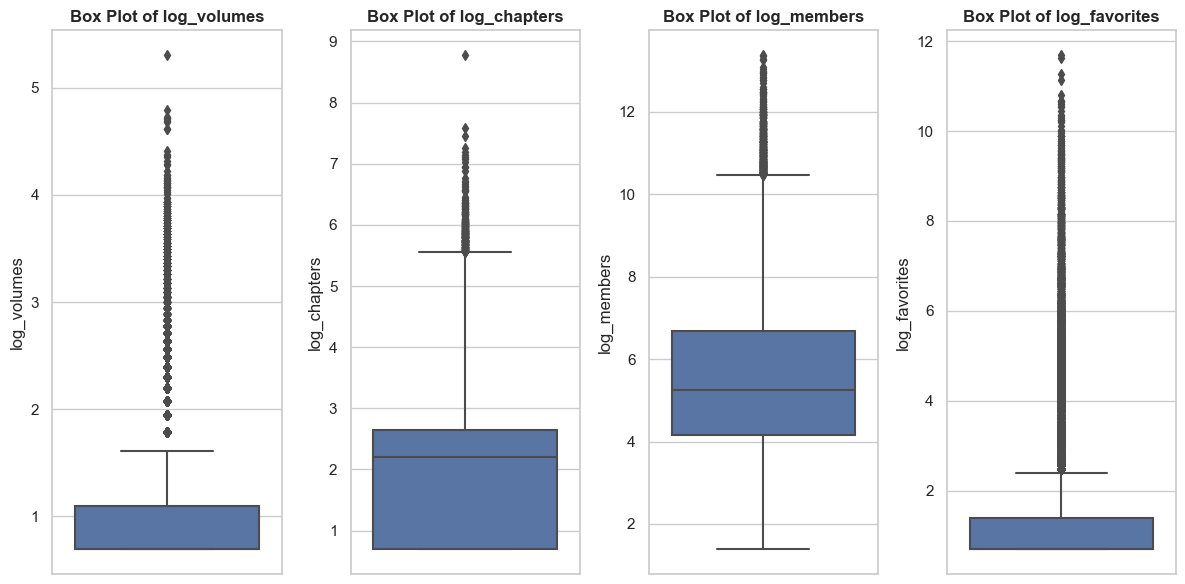

In [626]:
import seaborn as sns
columns_log = mangaCsv[['log_volumes', 'log_chapters', 'log_members', 'log_favorites']]

num_cols = 5
num_rows = (len(columns_log) + num_cols - 1) // num_cols
num_rows = 1 
plt.figure(figsize=(15, num_rows * 6))
sns.set(style="whitegrid") 

for i, column in enumerate(columns_log, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=mangaCsv[column])
    plt.title(f'Box Plot of {column}',fontweight='bold')

plt.tight_layout()
plt.show()

In log_volumes, most data points are concentrated at lower values, with outliers suggesting volumes with significantly higher counts. 

Log_chapters shows a slightly higher median and fewer outliers compared to log_volumes, indicating a more balanced distribution. 

Log_members exhibits a symmetrical distribution around the median, with some outliers at higher counts. 

Log_favorites depicts lower counts for most favorites, with a few outliers indicating significantly favored items. 

These transformations offer insights into central tendency and variability while pinpointing outliers, 

typical in skewed count data like volumes, chapters, members, and favorites.

Keeping the outliers after log transformation since they are less extreme but still present, it indicates they might be significant data points rather than errors or noise.

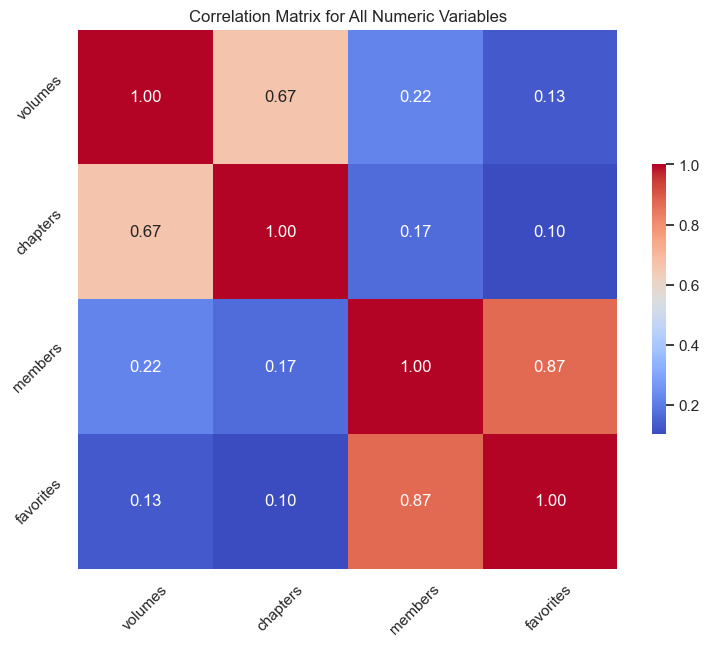

In [627]:
corr_matrix = mangaCsv[numerical_columns].corr()
plt.figure(figsize=(9, 7))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for All Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Notable correlations include a high positive correlation (0.67) between volumes and chapters, 

indicating their tendency to increase together. 

A very high positive correlation (0.87) between members and favorites suggests more members align with more favorites. 

A moderate positive correlation (0.57) between end year and end month hints at a connection between time variables, 

possibly indicating certain periods with more activity. 

Most other correlations range from weak to moderate, with many pairs showing little to no correlation (close to 0), 

implying no strong linear relationship. 

This correlation matrix aids in swiftly identifying relationships between variables, 

informing subsequent statistical analysis or predictive modeling in data analysis.

In [628]:
genres = mangaCsv['genres'].nunique()
type = mangaCsv['type'].nunique()

print(f"Number of unique categories in genres: {genres}")
print(f"Number of unique categories in type: {type}")

Number of unique categories in genres: 1788
Number of unique categories in type: 7


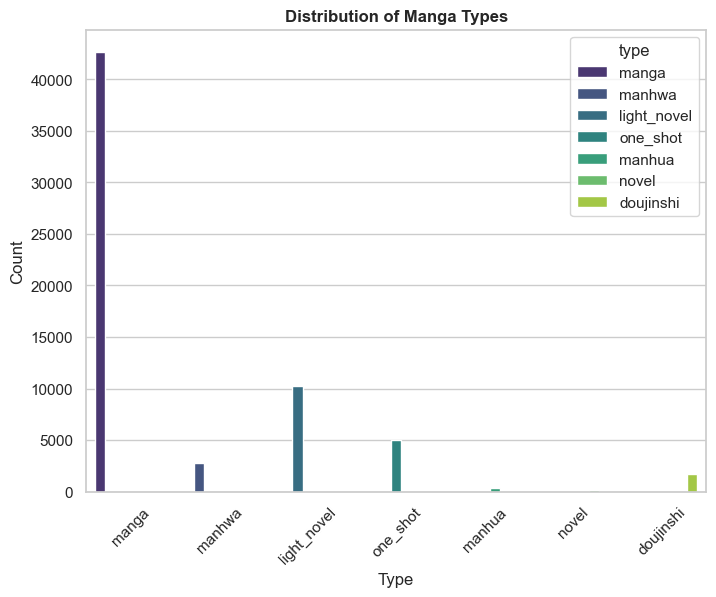

In [629]:
plt.figure(figsize=(8, 6))
sns.countplot(data=mangaCsv, x='type', hue='type', palette='viridis')
plt.title('Distribution of Manga Types', fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This illustrates the frequency count of various manga-related media types. 

Manga dominates the chart with the highest count, followed by light_novels, and one_shot. 

Manga stands out as the most prevalent type by a considerable margin, suggesting a specific focus on manga within the dataset. 

light_novels, and one_shot also show significant presence, while other types exhibit comparatively lower counts. 

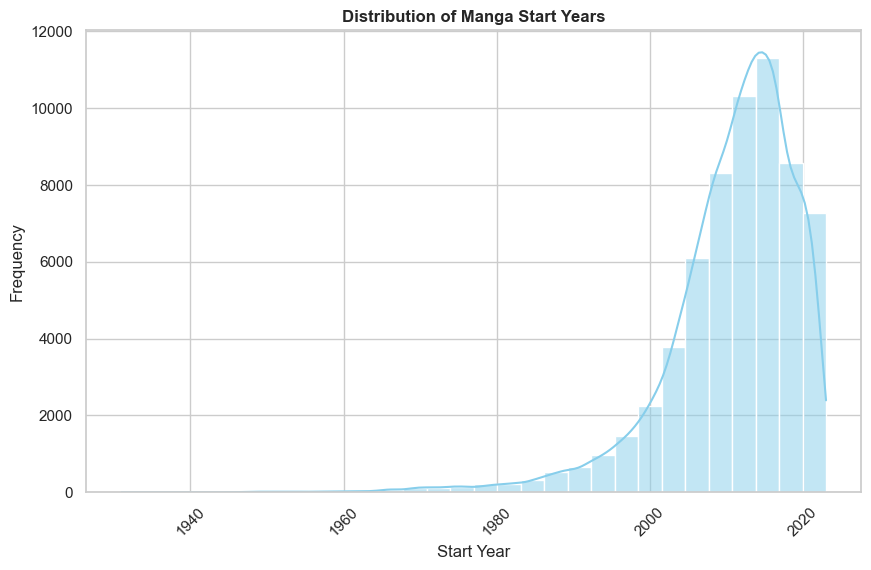

In [630]:
plt.figure(figsize=(10, 6))
sns.histplot(data=mangaCsv, x='start_year', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Manga Start Years', fontweight='bold')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The histogram depicts the frequency distribution of manga start years. 

The x-axis denotes the start years of manga, spanning from the earliest available data to recent years, 

while the y-axis represents the frequency of manga starts in each year. 

The highest bar indicates a peak in manga starts around the early 2000s, suggesting a period of heightened production or popularity. 

There is an observable upward trend in manga starts from 1940 to the early 2000s, followed by a noticeable decline thereafter. 

This trend reflects evolving industry dynamics, shifts in consumer preferences, or other influences impacting manga production over time.

In [631]:
mangaCsv.head()

,title,type,status,volumes,chapters,members,favorites,appropriate,genres,author_names,primary_demographic,secondary_demographic,start_year,start_month,end_year,end_month,log_volumes,log_chapters,log_members,log_favorites
0,Berserk,manga,currently_publishing,1.0,1.0,643969,119470,True,Action | Adventure | Award Winning | Drama ...,Kentarou Miura,Seinen,Shounen,1989,8,0,0,0.693147,0.693147,13.375407,11.690829
1,One Piece,manga,currently_publishing,1.0,1.0,579557,111462,True,Action | Adventure | Fantasy,Eiichiro Oda,Seinen,Shounen,1997,7,0,0,0.693147,0.693147,13.270021,11.621448
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,finished,24.0,96.0,248511,41713,True,Action | Adventure | Mystery | Supernatural,Hirohiko Araki,Seinen,Shounen,2004,1,2011,4,3.218876,4.574711,12.423246,10.638592
3,Oyasumi Punpun,manga,finished,13.0,147.0,413897,49361,True,Drama | Slice of Life,Inio Asano,Seinen,Shounen,2007,3,2013,11,2.639057,4.997212,12.933375,10.806936
4,Fullmetal Alchemist,manga,finished,27.0,116.0,284027,29634,True,Action | Adventure | Award Winning | Drama ...,Hiromu Arakawa,Seinen,Shounen,2001,7,2010,9,3.332205,4.762174,12.556828,10.296711


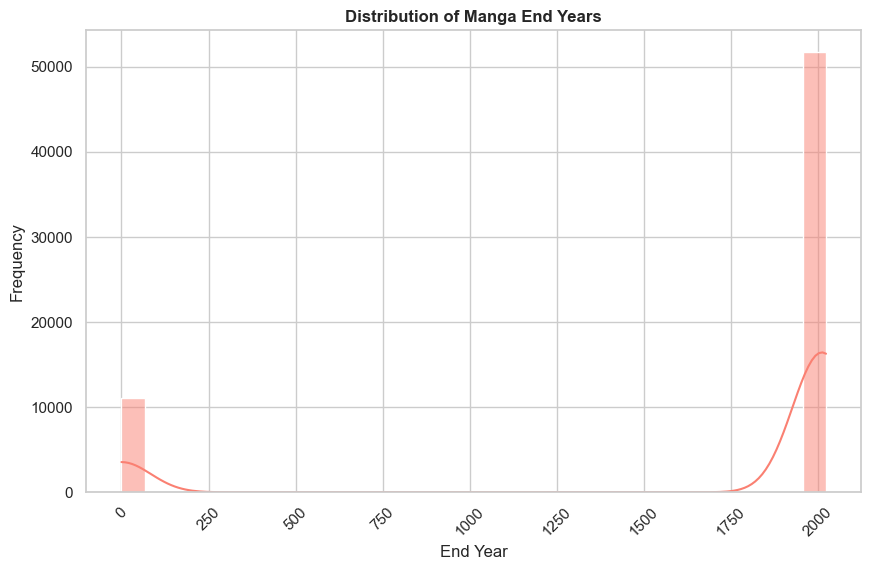

In [632]:
plt.figure(figsize=(10, 6))
sns.histplot(data=mangaCsv, x='end_year',  bins=30, kde=True, color='salmon')
plt.title('Distribution of Manga End Years', fontweight='bold')
plt.xlabel('End Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


This illustrates the frequency distribution of manga series end years. 

The x-axis represents the years when manga series concluded, while the y-axis denotes the frequency of manga endings in each year. 

A prominent spike, particularly around the year 2000, suggests a clustering of manga series endings during that period.

There are notably smaller frequencies for earlier years, possibly reflecting outliers, data anomalies, or placeholders for ongoing series. 

Overall, the histogram indicates a substantial number of manga series either concluded recently or remain ongoing, 

with the spike around 2000 indicating a notable period of series conclusions or ongoing serialization.

In [633]:
import pandas as pd
from scipy.stats import ttest_ind


high_popularity = mangaCsv[mangaCsv['members'] > mangaCsv['members'].quantile(0.75)]  # Top 25% of popularity
low_popularity = mangaCsv[mangaCsv['members'] <= mangaCsv['members'].quantile(0.25)]  # Bottom 25% of popularity

high_popularity = high_popularity.dropna(subset=['chapters'])
low_popularity = low_popularity.dropna(subset=['chapters'])

t_statistic, p_value = ttest_ind(high_popularity['chapters'], low_popularity['chapters'], equal_var=False)

alpha = 0.05

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of chapters between high and low popularity anime.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of chapters between high and low popularity anime.")


T-statistic: 34.35599267522518
P-value: 2.0245576240364444e-251
Reject the null hypothesis. There is a significant difference in the average number of chapters between high and low popularity anime.


> #### **This result suggests that there is a statistically significant disparity in the average number of chapters between manga with high popularity and those with low popularity.**